In [16]:
import requests
import matplotlib.pyplot as plt
import torch
import matplotlib.animation as animation
from IPython.display import display

https://www.geeksforgeeks.org/particle-swarm-optimization-pso-an-overview/  
https://github.com/mastqe/tsplib

In [17]:
response = requests.get("https://raw.githubusercontent.com/mastqe/tsplib/refs/heads/master/att48.tsp")
#print(response.text)

In [18]:
#make a proper class for parsing, so all of the other info is not lost

class Coordinate:
    def __init__(self, nodeId, x, y):
        self.nodeId = nodeId
        self.x = x
        self.y = y

unprocessedData = response.text.split("\n")
nodeCoordinates = []
nodeCoordinatesDictionary = {}
isCoordinateSection = False
for line in unprocessedData:
    line = line.strip()
    if "EOF" in line:
        break
    if isCoordinateSection:
        line = line.strip()
        stringData = line.split(" ")
        #newCoord = Coordinate(int(stringData[0]), int(stringData[1]), int(stringData[2]))
        nodeId = int(stringData[0])
        x = int(stringData[1])
        y = int(stringData[2])
        newCoord = (nodeId, x, y)
        nodeCoordinatesDictionary[nodeId] = (x, y)
        nodeCoordinates.append(newCoord)
    if "NODE_COORD_SECTION" in line:
        isCoordinateSection = True
        
#print(nodeCoordinates)
print(nodeCoordinatesDictionary)
        

{1: (6734, 1453), 2: (2233, 10), 3: (5530, 1424), 4: (401, 841), 5: (3082, 1644), 6: (7608, 4458), 7: (7573, 3716), 8: (7265, 1268), 9: (6898, 1885), 10: (1112, 2049), 11: (5468, 2606), 12: (5989, 2873), 13: (4706, 2674), 14: (4612, 2035), 15: (6347, 2683), 16: (6107, 669), 17: (7611, 5184), 18: (7462, 3590), 19: (7732, 4723), 20: (5900, 3561), 21: (4483, 3369), 22: (6101, 1110), 23: (5199, 2182), 24: (1633, 2809), 25: (4307, 2322), 26: (675, 1006), 27: (7555, 4819), 28: (7541, 3981), 29: (3177, 756), 30: (7352, 4506), 31: (7545, 2801), 32: (3245, 3305), 33: (6426, 3173), 34: (4608, 1198), 35: (23, 2216), 36: (7248, 3779), 37: (7762, 4595), 38: (7392, 2244), 39: (3484, 2829), 40: (6271, 2135), 41: (4985, 140), 42: (1916, 1569), 43: (7280, 4899), 44: (7509, 3239), 45: (10, 2676), 46: (6807, 2993), 47: (5185, 3258), 48: (3023, 1942)}


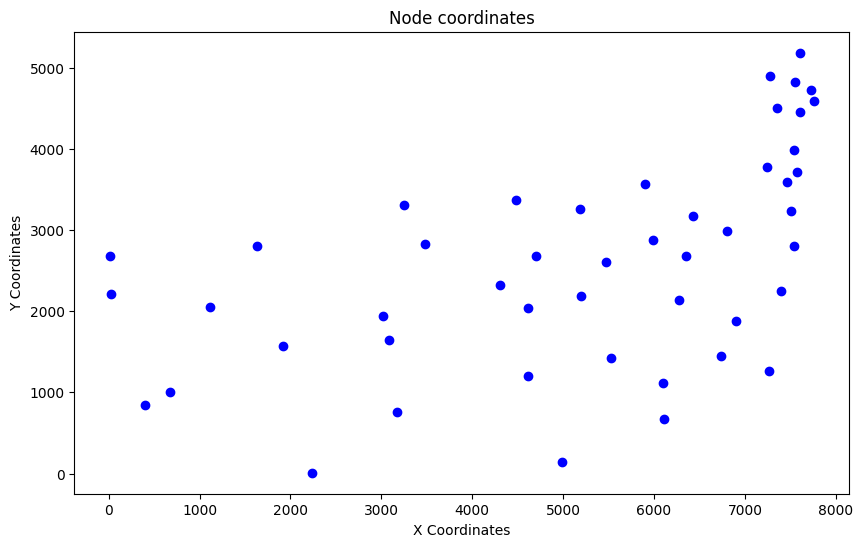

In [22]:
def plot_coordinates(nodeCoordinates):
    #x, y = [value[0], value[1] for key, value in nodeCoordinates.items()]
    nodeIds = list(nodeCoordinates.keys())
    xCoords = [coord[0] for coord in nodeCoordinates.values()]
    yCoords = [coord[1] for coord in nodeCoordinates.values()]
    # Plot the coordinates using matplotlib
    plt.figure(figsize=(10, 6))
    plt.scatter(xCoords, yCoords, c='blue', marker='o', label='Nodes')
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.title('Node coordinates')
    #plt.grid(True)
    plt.show()

# Example usage:

# Plot the coordinates
plot_coordinates(nodeCoordinatesDictionary)

In [23]:
class Particle:
    def __init__(self, nodeCount):
        self.position = torch.randperm(nodeCount)
        self.fitnessValue = 0
        self.localBestFitnessPosition = self.position.clone() 
        self.localBestFitnessValue = 0 
        self.velocity = torch.zeros(nodeCount)
        self.bestCost = float("inf")
    
    def evaluate(self):
        pass

In [24]:
class ParticleSwarmOptimiser:
    def __init__(self, nodeCount, particleCount, inertia, particleCognition, socialInfluence, minx, maxx, r1=1, r2=1):
        self.particleSwarm = [Particle(nodeCount) for _ in particleCount]
        self.w = inertia
        self.c1 = particleCognition
        self.c2 = socialInfluence
        self.r1 = r1
        self.r2 = r2
        self.minx = minx
        self.maxx = maxx
        self.globalBestFitnessPosition = 0
        self.globalBestFitnessValue = 0
        self.particleCount = particleCount
    
    def getBestSolution(self):
        return self.globalBestFitnessPosition, self.globalBestFitnessValue
    
    def optimise(self, maxIterations):
        for iteration in range(maxIterations):
            for i in range(self.particleCount):
                self.particleSwarm[i].velocity = (inertia*self.particleSwarm[i].velocity +
                                                 r1*c1*(self.particleSwarm[i].bestPos - self.particleSwarm[i].position) +
                                                 r2*c2*( self.globalBestFitnessPosition - self.particleSwarm[i].position))
                self.particleSwarm[i].position += self.particleSwarm[i].velocity
                if self.particleSwarm[i].position < minx:
                    self.particleSwarm[i].position = minx
                elif self.particleSwarm[i].position > maxx:
                    self.particleSwarm[i].position = maxx
                    
                if self.particleSwarm[i].fitnessValue < self.particleSwarm[i].localBestFitnessValue:
                        self.particleSwarm[i].localBestFitnessValue = self.particleSwarm[i].fitnessValue
                        self.particleSwarm[i].localBestFitnessPosition = self.particleSwarm[i].position

                if self.particleSwarm[i].fitnessValue < self.globalBestFitnessValue:
                    self.globalBestFitnessValue = self.particleSwarm[i].fitnessValue
                    self.globalBestFitnessPosition = self.particleSwarm[i].position
                        
    def refine():
        #take in new hyperparameters without necessarily modifying particle swarm
        pass
        

clean up code

modify the optimiser to work

tune hyperparameters

visualise each stage

use torch features throughout code

use more problem types, or do a comparison with a different type of optimisation e.g. ant colony